In [4]:
import pandas as pd

# Load the user interaction and metadata files
user_df = pd.read_csv("/home/u22/maheshg/Downloads/user_interaction.csv")
meta_df = pd.read_csv("/home/u22/maheshg/Downloads/metadata.csv")


In [5]:
# Quick check of the first few rows to understand data structure
from IPython.display import display

display(user_df.head())
display(meta_df.head())

,user_id,pratilipi_id,read_percent,updated_at
0,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291
1,5506791971543560,1377786223038206,40.0,2022-03-19 13:49:25.660
2,5506791996468218,1377786227025240,100.0,2022-03-21 17:28:47.288
3,5506791978752866,1377786222398208,65.0,2022-03-21 07:39:25.183
4,5506791978962946,1377786228157051,100.0,2022-03-22 17:32:44.777


,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at
0,-3418949279741297,1025741862639304,translation,0,2020-08-19 15:26:13,2016-09-30 10:37:04
1,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48
2,-2270332352037261,1377786215601962,translation,92,2020-09-29 12:33:57,2018-06-12 04:19:12
3,-2270332352521845,1377786215640994,translation,0,2019-10-17 09:03:37,2019-09-26 14:58:53
4,-2270332349665658,1377786215931338,translation,47,2020-05-05 11:33:41,2018-11-25 12:28:23


In [6]:
# Count unique pratilipi IDs to ensure consistency between datasets
print("Unique pratilipi_id in user_df:", user_df['pratilipi_id'].nunique())
print("Unique pratilipi_id in meta_df:", meta_df['pratilipi_id'].nunique())

Unique pratilipi_id in user_df: 241405
Unique pratilipi_id in meta_df: 486693


In [7]:
# Rename timestamp columns to be more descriptive
user_df.rename(columns={'updated_at': 'interaction_time'}, inplace=True)
meta_df.rename(columns={'updated_at': 'meta_updated_at'}, inplace=True)

In [8]:
# Convert timestamps from string format to datetime for easier calculations
user_df['interaction_time'] = pd.to_datetime(user_df['interaction_time'], format="%Y-%m-%d %H:%M:%S.%f")
meta_df['published_at'] = pd.to_datetime(meta_df['published_at'], format="%Y-%m-%d %H:%M:%S")
meta_df['meta_updated_at'] = pd.to_datetime(meta_df['meta_updated_at'], format="%Y-%m-%d %H:%M:%S")


In [9]:
# Check conversion 
print(user_df.dtypes)
print(meta_df.dtypes)


user_id                      int64
pratilipi_id                 int64
read_percent               float64
interaction_time    datetime64[ns]
dtype: object
author_id                   int64
pratilipi_id                int64
category_name              object
reading_time                int64
meta_updated_at    datetime64[ns]
published_at       datetime64[ns]
dtype: object


In [10]:
# Display user and meta data
display(user_df.head())
display(meta_df.head())


,user_id,pratilipi_id,read_percent,interaction_time
0,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291
1,5506791971543560,1377786223038206,40.0,2022-03-19 13:49:25.660
2,5506791996468218,1377786227025240,100.0,2022-03-21 17:28:47.288
3,5506791978752866,1377786222398208,65.0,2022-03-21 07:39:25.183
4,5506791978962946,1377786228157051,100.0,2022-03-22 17:32:44.777


,author_id,pratilipi_id,category_name,reading_time,meta_updated_at,published_at
0,-3418949279741297,1025741862639304,translation,0,2020-08-19 15:26:13,2016-09-30 10:37:04
1,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48
2,-2270332352037261,1377786215601962,translation,92,2020-09-29 12:33:57,2018-06-12 04:19:12
3,-2270332352521845,1377786215640994,translation,0,2019-10-17 09:03:37,2019-09-26 14:58:53
4,-2270332349665658,1377786215931338,translation,47,2020-05-05 11:33:41,2018-11-25 12:28:23


In [11]:
# Display user and meta data
display(user_df.tail())
display(meta_df.tail())

,user_id,pratilipi_id,read_percent,interaction_time
2499995,5506791965506371,1377786228243175,100.0,2022-03-19 04:37:10.568
2499996,5506791966125995,1377786221431279,100.0,2022-03-21 17:24:46.089
2499997,5506791964496442,1377786226829597,100.0,2022-03-22 08:04:29.219
2499998,5506791968781083,1377786226056467,100.0,2022-03-21 06:41:54.083
2499999,5506791956021363,1377786226666757,100.0,2022-03-20 08:59:49.346


,author_id,pratilipi_id,category_name,reading_time,meta_updated_at,published_at
954496,-2270332337845247,1377786228358627,Horror-Marathon,304,2022-03-22 17:40:22,2022-03-22 17:40:22
954497,-2270332334263077,1377786228362002,Horror-Marathon,588,2022-03-22 11:44:39,2022-03-22 11:44:39
954498,-2270332350350076,1377786228362682,Horror-Marathon,359,2022-03-22 12:39:41,2022-03-22 12:38:40
954499,-2270332337845247,1377786228375726,Horror-Marathon,310,2022-03-23 15:55:11,2022-03-23 15:55:11
954500,-2270332334263077,1377786228376825,Horror-Marathon,534,2022-03-23 10:52:43,2022-03-23 10:52:42


In [12]:
# Merge user interaction data with metadata using an inner join on 'pratilipi_id'
# This ensures that we only keep stories that exist in both datasets
merged_df = pd.merge(user_df, meta_df, on='pratilipi_id', how='inner')

# Display a preview of the merged dataset
display(merged_df.head())
display(merged_df.tail())


,user_id,pratilipi_id,read_percent,interaction_time,author_id,category_name,reading_time,meta_updated_at,published_at
0,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,novels,376,2022-03-15 18:39:52,2022-03-15 18:39:52
1,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,family,376,2022-03-15 18:39:52,2022-03-15 18:39:52
2,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,romance,376,2022-03-15 18:39:52,2022-03-15 18:39:52
3,5506791966456696,1377786228262109,100.0,2022-03-21 07:11:52.070,-2270332349684758,novels,376,2022-03-15 18:39:52,2022-03-15 18:39:52
4,5506791966456696,1377786228262109,100.0,2022-03-21 07:11:52.070,-2270332349684758,family,376,2022-03-15 18:39:52,2022-03-15 18:39:52


,user_id,pratilipi_id,read_percent,interaction_time,author_id,category_name,reading_time,meta_updated_at,published_at
3974673,5506791964090961,1377786223439104,100.0,2022-03-22 17:59:08.428,-2270332337041094,suspense,749,2022-02-12 08:00:48,2021-04-24 08:36:46
3974674,5506791964090961,1377786223439104,100.0,2022-03-22 17:59:08.428,-2270332337041094,horror,749,2022-02-12 08:00:48,2021-04-24 08:36:46
3974675,5506791951724432,1377786226597549,100.0,2022-03-22 16:54:16.855,-2270332349733273,novels,645,2021-11-28 16:18:10,2021-11-28 16:18:09
3974676,5506791951724432,1377786226597549,100.0,2022-03-22 16:54:16.855,-2270332349733273,social,645,2021-11-28 16:18:10,2021-11-28 16:18:09
3974677,5506791991347424,1377786228335997,100.0,2022-03-22 10:09:08.917,-2270332346905736,romance,3,2022-03-21 00:08:05,2022-03-21 00:08:05


In [13]:
# Calculate how old the story was when the user interacted with it
merged_df['story_age_days'] = (merged_df['interaction_time'] - merged_df['published_at']).dt.days

# Convert days into years for better readability
merged_df['story_age_years'] = (merged_df['story_age_days'] // 365).astype(int)

# Display updated dataset with new age-related columns
display(merged_df.head())

,user_id,pratilipi_id,read_percent,interaction_time,author_id,category_name,reading_time,meta_updated_at,published_at,story_age_days,story_age_years
0,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,novels,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0
1,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,family,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0
2,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,romance,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0
3,5506791966456696,1377786228262109,100.0,2022-03-21 07:11:52.070,-2270332349684758,novels,376,2022-03-15 18:39:52,2022-03-15 18:39:52,5,0
4,5506791966456696,1377786228262109,100.0,2022-03-21 07:11:52.070,-2270332349684758,family,376,2022-03-15 18:39:52,2022-03-15 18:39:52,5,0


In [14]:
# Identify and count rows where the story age is negative (invalid data)
Negative_data = merged_df[merged_df['story_age_days'] < 0]
print("Number of invalid rows (story_age_days < 0):", Negative_data.shape[0])


Number of invalid rows (story_age_days < 0): 105


In [15]:
# Show some examples of incorrect data (interaction happened before the story was published)
display(Negative_data.head())

,user_id,pratilipi_id,read_percent,interaction_time,author_id,category_name,reading_time,meta_updated_at,published_at,story_age_days,story_age_years
208453,5506791970357059,1377786228301137,0.0,2022-03-20 09:46:36.062,-2270332330951340,romance,684,2022-03-20 09:47:43,2022-03-20 09:47:43,-1,-1
208454,5506791970357059,1377786228301137,0.0,2022-03-20 09:46:36.062,-2270332330951340,suspense,684,2022-03-20 09:47:43,2022-03-20 09:47:43,-1,-1
903365,5506791950180542,1377786228211622,0.0,2022-03-19 08:10:44.656,-2270332349516917,novels,731,2022-03-22 06:30:11,2022-03-22 06:30:11,-3,-1
903366,5506791950180542,1377786228211622,0.0,2022-03-19 08:10:44.656,-2270332349516917,social,731,2022-03-22 06:30:11,2022-03-22 06:30:11,-3,-1
903367,5506791950180542,1377786228211622,0.0,2022-03-19 08:10:44.656,-2270332349516917,women,731,2022-03-22 06:30:11,2022-03-22 06:30:11,-3,-1


In [16]:
# Remove invalid rows where story_age_days is negative
merged_df.drop(merged_df[merged_df['story_age_days'] < 0].index, inplace=True)

In [17]:
# Confirm that invalid rows have been removed
print("Remaining negative values:", merged_df[merged_df['story_age_days'] < 0].shape[0])

Remaining negative values: 0


In [18]:
# story age by years greater than zero
count_years = merged_df[merged_df['story_age_years'] > 0]

# Get and print the count of rows for that user_id
count = count_years.shape[0]
print(count)

1308197


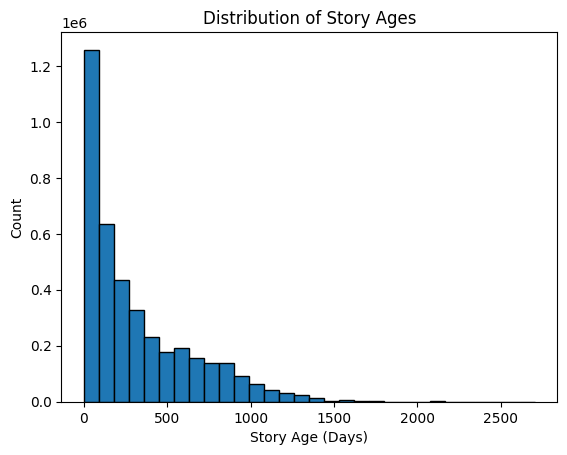

In [19]:
import matplotlib.pyplot as plt

# Plot a histogram of story ages to see how they are distributed
plt.hist(merged_df['story_age_days'], bins=30, edgecolor='black')
plt.title("Distribution of Story Ages")
plt.xlabel("Story Age (Days)")
plt.ylabel("Count")
plt.show()


In [20]:
# Check for missing values
print(merged_df.isnull().sum())

user_id             0
pratilipi_id        0
read_percent        0
interaction_time    0
author_id           0
category_name       0
reading_time        0
meta_updated_at     0
published_at        0
story_age_days      0
story_age_years     0
dtype: int64


In [21]:
#check Datatypes
print(merged_df.dtypes)

user_id                      int64
pratilipi_id                 int64
read_percent               float64
interaction_time    datetime64[ns]
author_id                    int64
category_name               object
reading_time                 int64
meta_updated_at     datetime64[ns]
published_at        datetime64[ns]
story_age_days               int64
story_age_years              int64
dtype: object


In [22]:
# Extract the hour from the interaction timestamp
# Helps analyze when users are most active (morning, afternoon, night, etc.)
merged_df['interaction_hour'] = merged_df['interaction_time'].dt.hour

# Extract the day of the month from the interaction timestamp
# Useful for identifying trends in user engagement on specific days
merged_df['interaction_day'] = merged_df['interaction_time'].dt.day

# Extract the month from the interaction timestamp
# Helps in analyzing seasonal trends (e.g., higher reading activity in certain months)
merged_df['interaction_month'] = merged_df['interaction_time'].dt.month

# Extract the weekday from the interaction timestamp (0 = Monday, 6 = Sunday)
# Helps determine if users read more on weekdays vs. weekends
merged_df['interaction_weekday'] = merged_df['interaction_time'].dt.weekday


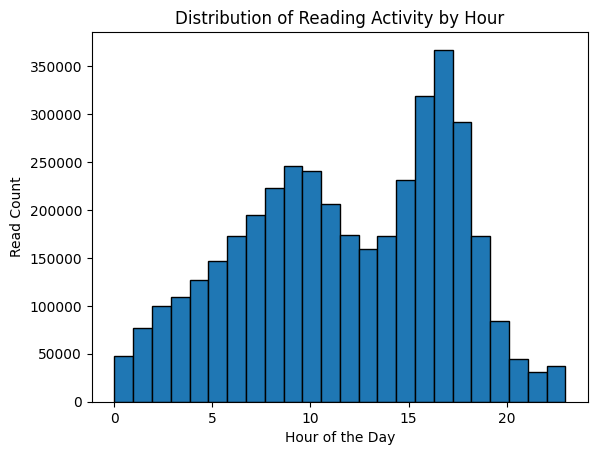

In [23]:
# Plot a histogram of Interaction hour to see how they are distributed
plt.hist(merged_df['interaction_hour'], bins=24, edgecolor='black')
plt.title("Distribution of Reading Activity by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Read Count")
plt.show()


In [24]:
# display merged dataframe
display(merged_df.head())

,user_id,pratilipi_id,read_percent,interaction_time,author_id,category_name,reading_time,meta_updated_at,published_at,story_age_days,story_age_years,interaction_hour,interaction_day,interaction_month,interaction_weekday
0,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,novels,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0,10,22,3,1
1,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,family,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0,10,22,3,1
2,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,romance,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0,10,22,3,1
3,5506791966456696,1377786228262109,100.0,2022-03-21 07:11:52.070,-2270332349684758,novels,376,2022-03-15 18:39:52,2022-03-15 18:39:52,5,0,7,21,3,0
4,5506791966456696,1377786228262109,100.0,2022-03-21 07:11:52.070,-2270332349684758,family,376,2022-03-15 18:39:52,2022-03-15 18:39:52,5,0,7,21,3,0


In [25]:
# Filter rows for the specified user_id
filtered_user_df = merged_df[merged_df['user_id'] == 5506791996625292]

# Print the filtered DataFrame
display(filtered_user_df.head(10))

# Get and print the count of rows for that user_id
count = filtered_user_df.shape[0]
print("Count of rows for user_id 5506791996625292:", count)

,user_id,pratilipi_id,read_percent,interaction_time,author_id,category_name,reading_time,meta_updated_at,published_at,story_age_days,story_age_years,interaction_hour,interaction_day,interaction_month,interaction_weekday
7772,5506791996625292,286572936861384,21.468618,2022-03-22 07:49:08.699,-3343952901240177,suspense,859,2021-06-09 08:28:13,2016-09-09 09:32:58,2019,5,7,22,3,1
186440,5506791996625292,1377786217798064,100.000000,2022-03-22 07:09:48.412,-2270332345553957,family,459,2021-06-19 19:12:59,2020-01-07 18:08:02,804,2,7,22,3,1
186441,5506791996625292,1377786217798064,100.000000,2022-03-22 07:09:48.412,-2270332345553957,romance,459,2021-06-19 19:12:59,2020-01-07 18:08:02,804,2,7,22,3,1
186442,5506791996625292,1377786217798064,100.000000,2022-03-22 07:09:48.412,-2270332345553957,women,459,2021-06-19 19:12:59,2020-01-07 18:08:02,804,2,7,22,3,1
3401549,5506791996625292,1377786217290804,100.000000,2022-03-22 08:24:53.860,-2270332345978054,mythology,739,2020-01-24 05:23:35,2019-09-29 11:20:32,904,2,8,22,3,1
3401550,5506791996625292,1377786217290804,100.000000,2022-03-22 08:24:53.860,-2270332345978054,romance,739,2020-01-24 05:23:35,2019-09-29 11:20:32,904,2,8,22,3,1
3401551,5506791996625292,1377786217290804,100.000000,2022-03-22 08:24:53.860,-2270332345978054,social,739,2020-01-24 05:23:35,2019-09-29 11:20:32,904,2,8,22,3,1


Count of rows for user_id 5506791996625292: 7


In [26]:
# Filter rows for the specified user_id
filtered_user_df_1 = merged_df[merged_df['user_id'] == 5506791961876448]

# Print the filtered DataFrame
display(filtered_user_df_1.head(10))

# Get and print the count of rows for that user_id
count = filtered_user_df_1.shape[0]
print("Count of rows for user_id 5506791961876448:", count)

,user_id,pratilipi_id,read_percent,interaction_time,author_id,category_name,reading_time,meta_updated_at,published_at,story_age_days,story_age_years,interaction_hour,interaction_day,interaction_month,interaction_weekday
0,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,novels,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0,10,22,3,1
1,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,family,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0,10,22,3,1
2,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,romance,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0,10,22,3,1
139170,5506791961876448,1377786228237359,100.0,2022-03-19 07:19:15.526,-2270332349684758,novels,377,2022-03-14 06:07:21,2022-03-14 06:07:21,5,0,7,19,3,5
139171,5506791961876448,1377786228237359,100.0,2022-03-19 07:19:15.526,-2270332349684758,family,377,2022-03-14 06:07:21,2022-03-14 06:07:21,5,0,7,19,3,5
139172,5506791961876448,1377786228237359,100.0,2022-03-19 07:19:15.526,-2270332349684758,romance,377,2022-03-14 06:07:21,2022-03-14 06:07:21,5,0,7,19,3,5


Count of rows for user_id 5506791961876448: 6


In [27]:
# Estimate the total number of words read, assuming 200 words per minute reading speed
merged_df['total_read_words'] = (merged_df['reading_time'] / 60) * 200
    
# Adjust total read words by read percentage to get the actual effective words read
merged_df['effective_read_words'] = merged_df['total_read_words'] * (merged_df['read_percent'] / 100)

In [28]:
# Display a sample of the calculations
display(merged_df[['reading_time', 'total_read_words', 'effective_read_words']].head())

,reading_time,total_read_words,effective_read_words
0,376,1253.333333,1253.333333
1,376,1253.333333,1253.333333
2,376,1253.333333,1253.333333
3,376,1253.333333,1253.333333
4,376,1253.333333,1253.333333


In [29]:
# Get the unique category names from the 'category_name' column
unique_categories = merged_df['category_name'].unique()

# Print the unique category names
print("Unique category names:")
print(unique_categories)

Unique category names:
['novels' 'family' 'romance' 'suspense' 'action-and-adventure' 'webseries'
 'swahindi2' 'entertainment' 'women' 'horror' 'social' 'shortstories'
 'drama' 'science-fiction' 'Horror-Marathon' 'Pratilipi-kalamkar-samman'
 'fantasy' 'crime' 'moral-inspiring' 'experiences-and-memories' 'children'
 'life' 'relegion-and-spiritual' 'mythology' 'Pratilipi-Awards-Hindi'
 'comedy' 'translation' 'krishi-jeevan' 'short-story-challenge'
 'Indiawale' 'Serieswriting' 'erotica' 'detective' 'murder-mystery'
 'premkamahina' 'crime-lekhan' 'politics' 'health-and-wellness'
 'pratilipi-kids' 'The-Chat-Story' 'Parytan' 'cyber-crime-fiction'
 'Rashtriya' 'pravasi-sahitya' 'Radio-Fiction']


In [30]:
display(merged_df.head())

,user_id,pratilipi_id,read_percent,interaction_time,author_id,category_name,reading_time,meta_updated_at,published_at,story_age_days,story_age_years,interaction_hour,interaction_day,interaction_month,interaction_weekday,total_read_words,effective_read_words
0,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,novels,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0,10,22,3,1,1253.333333,1253.333333
1,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,family,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0,10,22,3,1,1253.333333,1253.333333
2,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,romance,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0,10,22,3,1,1253.333333,1253.333333
3,5506791966456696,1377786228262109,100.0,2022-03-21 07:11:52.070,-2270332349684758,novels,376,2022-03-15 18:39:52,2022-03-15 18:39:52,5,0,7,21,3,0,1253.333333,1253.333333
4,5506791966456696,1377786228262109,100.0,2022-03-21 07:11:52.070,-2270332349684758,family,376,2022-03-15 18:39:52,2022-03-15 18:39:52,5,0,7,21,3,0,1253.333333,1253.333333


In [31]:
# Convert the 'category_name' column into multiple binary columns (One-Hot Encoding)
# Each unique category becomes its own column with 1 (if present) or 0 (if not)
merged_df_encoded = pd.get_dummies(merged_df, columns=['category_name'])

# Define the columns to display (original IDs + newly created category columns)
cols_to_show = ['user_id', 'pratilipi_id', 'author_id'] + \
               [col for col in merged_df_encoded.columns if col.startswith('category_name_')]

# Collect the names of all newly created category columns
category_cols = [col for col in merged_df_encoded.columns if col.startswith('category_name_')]

#Ensure category columns are strictly 0 or 1, avoiding float values from pandas' default behavior.
merged_df_encoded[category_cols] = merged_df_encoded[category_cols].astype(int)

# Display the first few rows of the encoded category columns
display(merged_df_encoded[category_cols].head())

,category_name_Horror-Marathon,category_name_Indiawale,category_name_Parytan,category_name_Pratilipi-Awards-Hindi,category_name_Pratilipi-kalamkar-samman,category_name_Radio-Fiction,category_name_Rashtriya,category_name_Serieswriting,category_name_The-Chat-Story,category_name_action-and-adventure,...,category_name_romance,category_name_science-fiction,category_name_short-story-challenge,category_name_shortstories,category_name_social,category_name_suspense,category_name_swahindi2,category_name_translation,category_name_webseries,category_name_women
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
print(merged_df_encoded.dtypes)

user_id                               int64
pratilipi_id                          int64
read_percent                        float64
interaction_time             datetime64[ns]
author_id                             int64
                                  ...      
category_name_suspense                int64
category_name_swahindi2               int64
category_name_translation             int64
category_name_webseries               int64
category_name_women                   int64
Length: 61, dtype: object


In [33]:
# Display the original dataset before One-Hot Encoding to show 'category_name' as a single column
display(merged_df[['pratilipi_id', 'category_name']].head()) 

# Display the transformed dataset after One-Hot Encoding, where 'category_name' is split into multiple binary columns
display(merged_df_encoded.head())  # After


,pratilipi_id,category_name
0,1377786228262109,novels
1,1377786228262109,family
2,1377786228262109,romance
3,1377786228262109,novels
4,1377786228262109,family


,user_id,pratilipi_id,read_percent,interaction_time,author_id,reading_time,meta_updated_at,published_at,story_age_days,story_age_years,...,category_name_romance,category_name_science-fiction,category_name_short-story-challenge,category_name_shortstories,category_name_social,category_name_suspense,category_name_swahindi2,category_name_translation,category_name_webseries,category_name_women
0,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0,...,0,0,0,0,0,0,0,0,0,0
1,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0,...,0,0,0,0,0,0,0,0,0,0
2,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2270332349684758,376,2022-03-15 18:39:52,2022-03-15 18:39:52,6,0,...,1,0,0,0,0,0,0,0,0,0
3,5506791966456696,1377786228262109,100.0,2022-03-21 07:11:52.070,-2270332349684758,376,2022-03-15 18:39:52,2022-03-15 18:39:52,5,0,...,0,0,0,0,0,0,0,0,0,0
4,5506791966456696,1377786228262109,100.0,2022-03-21 07:11:52.070,-2270332349684758,376,2022-03-15 18:39:52,2022-03-15 18:39:52,5,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Apply Label Encoding to convert categorical IDs (user_id, pratilipi_id, author_id) into unique integer values
# This assigns a unique numeric code to each unique ID, making them suitable for machine learning models
merged_df_encoded['user_id'] = merged_df_encoded['user_id'].astype('category').cat.codes
merged_df_encoded['pratilipi_id'] = merged_df_encoded['pratilipi_id'].astype('category').cat.codes
merged_df_encoded['author_id'] = merged_df_encoded['author_id'].astype('category').cat.codes

In [35]:
# Identify rows where 'read_percent' is invalid (< 0 or > 100)
removed_rows = merged_df_encoded[(merged_df_encoded['read_percent'] < 0) | (merged_df_encoded['read_percent'] > 100)]

# Count and remove these invalid rows
removed_count = removed_rows.shape[0]

# Remove rows where 'read_percent' is less than 0 or greater than 100
merged_df_encoded = merged_df_encoded[(merged_df_encoded['read_percent'] >= 0) & (merged_df_encoded['read_percent'] <= 100)]

# Display the count of removed rows
print(f"Number of removed rows: {removed_count}")

# Display the removed rows
display(removed_rows)

Number of removed rows: 45


,user_id,pratilipi_id,read_percent,interaction_time,author_id,reading_time,meta_updated_at,published_at,story_age_days,story_age_years,...,category_name_romance,category_name_science-fiction,category_name_short-story-challenge,category_name_shortstories,category_name_social,category_name_suspense,category_name_swahindi2,category_name_translation,category_name_webseries,category_name_women
111306,151272,1443,150.000000,2022-03-22 03:18:00.379,930,840,2020-09-03 14:57:44,2018-07-21 11:55:55,1339,3,...,1,0,0,0,0,0,0,0,0,0
111307,151272,1443,150.000000,2022-03-22 03:18:00.379,930,840,2020-09-03 14:57:44,2018-07-21 11:55:55,1339,3,...,0,0,0,1,0,0,0,0,0,0
111308,151272,1443,150.000000,2022-03-22 03:18:00.379,930,840,2020-09-03 14:57:44,2018-07-21 11:55:55,1339,3,...,0,0,0,0,1,0,0,0,0,0
180364,172071,2584,109.090909,2022-03-20 16:40:53.252,161,15354,2020-11-17 11:25:04,2018-09-12 09:09:43,1285,3,...,1,0,0,0,0,0,0,0,0,0
180365,172071,2584,109.090909,2022-03-20 16:40:53.252,161,15354,2020-11-17 11:25:04,2018-09-12 09:09:43,1285,3,...,0,0,0,0,1,0,0,0,0,0
180366,172071,2584,109.090909,2022-03-20 16:40:53.252,161,15354,2020-11-17 11:25:04,2018-09-12 09:09:43,1285,3,...,0,0,0,0,0,0,0,0,0,1
344491,109784,9092,125.000000,2022-03-22 10:13:51.047,931,1048,2020-02-07 09:37:42,2019-06-20 08:26:16,1006,2,...,0,0,0,0,0,0,0,0,0,0
344574,139030,9092,133.333333,2022-03-22 14:53:05.950,931,1048,2020-02-07 09:37:42,2019-06-20 08:26:16,1006,2,...,0,0,0,0,0,0,0,0,0,0
344733,175971,9092,500.000000,2022-03-21 05:53:26.984,931,1048,2020-02-07 09:37:42,2019-06-20 08:26:16,1004,2,...,0,0,0,0,0,0,0,0,0,0
1142162,133856,10643,800.000000,2022-03-19 04:19:57.265,3874,502,2020-01-24 07:33:59,2019-07-20 02:39:33,973,2,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Get unique read_percent values and select the top 5 highest ones
top_read_percent = sorted(merged_df_encoded['read_percent'].unique(), reverse=True)[:5]

# Select only one row per unique read_percent value
unique_read_percent_df = merged_df_encoded.loc[merged_df_encoded['read_percent'].isin(top_read_percent)].drop_duplicates(subset=['read_percent'])

# Display the table with unique read_percent values
display(unique_read_percent_df[['read_percent', 'reading_time', 'total_read_words', 'effective_read_words']])


,read_percent,reading_time,total_read_words,effective_read_words
0,100.000000,376,1253.333333,1253.333333
71839,99.987300,257,856.666667,856.557870
189426,99.986916,362,1206.666667,1206.508786
449936,99.987350,742,2473.333333,2473.020457
583248,99.982740,374,1246.666667,1246.451492


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Define numerical columns that need to be scaled (normalize)
cols_to_normalize = [
    'reading_time', 'story_age_days', 'story_age_years', 'interaction_hour', 'interaction_day', 'interaction_month', 'interaction_weekday']

# Create an instance of MinMaxScaler
# Apply Min-Max Scaling (scales values between 0 and 1)
scaler = MinMaxScaler()

# Fit and transform the specified columns in merged_df
merged_df_encoded[cols_to_normalize] = scaler.fit_transform(merged_df_encoded[cols_to_normalize])

# Apply Log Transformation to effective_read_words to reduce skewness
merged_df_encoded['effective_read_words'] = np.log1p(merged_df_encoded['effective_read_words'])

# Display normalized columns for verification
display(merged_df_encoded[cols_to_normalize].head())

# Display a heading before showing the transformed values
print(" Effective Read Words After Log Transformation:\n")

# Display the first 5 rows with index reset for better readability
display(merged_df_encoded[['effective_read_words']].head().reset_index(drop=True))


,reading_time,story_age_days,story_age_years,interaction_hour,interaction_day,interaction_month,interaction_weekday
0,0.005002,0.002218,0.0,0.434783,0.8,0.0,0.166667
1,0.005002,0.002218,0.0,0.434783,0.8,0.0,0.166667
2,0.005002,0.002218,0.0,0.434783,0.8,0.0,0.166667
3,0.005002,0.001848,0.0,0.304348,0.6,0.0,0.000000
4,0.005002,0.001848,0.0,0.304348,0.6,0.0,0.000000


📌 Effective Read Words After Log Transformation:



,effective_read_words
0,7.13436
1,7.13436
2,7.13436
3,7.13436
4,7.13436


In [38]:
# Display data
display(merged_df_encoded.head())

,user_id,pratilipi_id,read_percent,interaction_time,author_id,reading_time,meta_updated_at,published_at,story_age_days,story_age_years,...,category_name_romance,category_name_science-fiction,category_name_short-story-challenge,category_name_shortstories,category_name_social,category_name_suspense,category_name_swahindi2,category_name_translation,category_name_webseries,category_name_women
0,58023,132100,100.0,2022-03-22 10:29:57.291,2685,0.005002,2022-03-15 18:39:52,2022-03-15 18:39:52,0.002218,0.0,...,0,0,0,0,0,0,0,0,0,0
1,58023,132100,100.0,2022-03-22 10:29:57.291,2685,0.005002,2022-03-15 18:39:52,2022-03-15 18:39:52,0.002218,0.0,...,0,0,0,0,0,0,0,0,0,0
2,58023,132100,100.0,2022-03-22 10:29:57.291,2685,0.005002,2022-03-15 18:39:52,2022-03-15 18:39:52,0.002218,0.0,...,1,0,0,0,0,0,0,0,0,0
3,89358,132100,100.0,2022-03-21 07:11:52.070,2685,0.005002,2022-03-15 18:39:52,2022-03-15 18:39:52,0.001848,0.0,...,0,0,0,0,0,0,0,0,0,0
4,89358,132100,100.0,2022-03-21 07:11:52.070,2685,0.005002,2022-03-15 18:39:52,2022-03-15 18:39:52,0.001848,0.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the columns to be used as input features
non_target_cols = ['user_id', 'author_id', 'story_age_days', 
                   'interaction_hour', 'interaction_day', 'interaction_month', 'interaction_weekday']

# Select all category columns created from One-Hot Encoding
category_cols = [col for col in merged_df_encoded.columns if col.startswith('category_name_')]

# Combine both sets of features
feature_cols = non_target_cols + category_cols
print(feature_cols)

['user_id', 'author_id', 'story_age_days', 'interaction_hour', 'interaction_day', 'interaction_month', 'interaction_weekday', 'category_name_Horror-Marathon', 'category_name_Indiawale', 'category_name_Parytan', 'category_name_Pratilipi-Awards-Hindi', 'category_name_Pratilipi-kalamkar-samman', 'category_name_Radio-Fiction', 'category_name_Rashtriya', 'category_name_Serieswriting', 'category_name_The-Chat-Story', 'category_name_action-and-adventure', 'category_name_children', 'category_name_comedy', 'category_name_crime', 'category_name_crime-lekhan', 'category_name_cyber-crime-fiction', 'category_name_detective', 'category_name_drama', 'category_name_entertainment', 'category_name_erotica', 'category_name_experiences-and-memories', 'category_name_family', 'category_name_fantasy', 'category_name_health-and-wellness', 'category_name_horror', 'category_name_krishi-jeevan', 'category_name_life', 'category_name_moral-inspiring', 'category_name_murder-mystery', 'category_name_mythology', 'cat

In [40]:
# Define input (X) as feature matrix and target (y) as 'effective_read_words'
X = merged_df_encoded[feature_cols].values   
y = merged_df_encoded['effective_read_words'].values  

# Split data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert data to PyTorch tensors for model training
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add extra dimension for PyTorch
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create dataset objects for PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define batch size for training
batch_size = 128

# Create DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [41]:
import torch.nn.functional as F

# Get input dimension (number of features)
input_dim = X_train_tensor.shape[1]

# Define the neural network model for regression
class RegressionNN(nn.Module):
    def __init__(self, input_dim):
        super(RegressionNN, self).__init__()

        self.fc1 = nn.Linear(input_dim, 256)
        self.batch_norm1 = nn.BatchNorm1d(256)  
        self.dropout1 = nn.Dropout(0.4)  

        self.fc2 = nn.Linear(256, 128)
        self.batch_norm2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.4)

        self.fc3 = nn.Linear(128, 64)
        self.batch_norm3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.4)

        self.fc4 = nn.Linear(64, 1)  # Output layer (single regression output)

        self.leaky_relu = nn.LeakyReLU(0.01)  # Activation function

    def forward(self, x):
        x = self.leaky_relu(self.batch_norm1(self.fc1(x)))
        x = self.dropout1(x)
        x = self.leaky_relu(self.batch_norm2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.leaky_relu(self.batch_norm3(self.fc3(x)))
        x = self.dropout3(x)
        x = self.fc4(x)  # Output layer (No activation for regression)
        return x

    
# Function to initialize weights
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)
        
        
# Create model instance
model = RegressionNN(input_dim)
model.apply(initialize_weights)


# Use GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


RegressionNN(
  (fc1): Linear(in_features=52, out_features=256, bias=True)
  (batch_norm1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (batch_norm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.4, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (batch_norm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.4, inplace=False)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.01)
)

In [54]:

# Use AdamW optimizer with weight decay to prevent overfitting
optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-4)  

# Mean Squared Error (MSE) is used for regression
criterion = nn.MSELoss()

# Learning rate scheduler to reduce LR every 5 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  


# Training with Early Stopping 
num_epochs = 30  
patience = 5  
best_test_loss = float('inf')  
epochs_no_improve = 0  

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * batch_X.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)

    # Evaluate model on test data
    model.eval()
    running_test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            running_test_loss += loss.item() * batch_X.size(0)

    epoch_test_loss = running_test_loss / len(test_loader.dataset)
    test_losses.append(epoch_test_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

    # Check for early stopping
    if epoch_test_loss < best_test_loss:
        best_test_loss = epoch_test_loss  
        epochs_no_improve = 0  
    else:
        epochs_no_improve += 1  

    if epochs_no_improve >= patience:
        print(f"Early stopping triggered after {epoch+1} epochs! Best Test Loss: {best_test_loss:.4f}")
        torch.save(model.state_dict(), "model_weights.pth")
        break
    
    scheduler.step()  # Adjust learning rate dynamically
    
torch.save(model.state_dict(), "model_weights.pth")

torch.save(model, "full model.pth")

Epoch 1/30, Train Loss: 0.8830, Test Loss: 0.8748
Epoch 2/30, Train Loss: 0.8828, Test Loss: 0.8757
Epoch 3/30, Train Loss: 0.8820, Test Loss: 0.8733
Epoch 4/30, Train Loss: 0.8813, Test Loss: 0.8711
Epoch 5/30, Train Loss: 0.8802, Test Loss: 0.8722
Epoch 6/30, Train Loss: 0.8731, Test Loss: 0.8626
Epoch 7/30, Train Loss: 0.8714, Test Loss: 0.8976
Epoch 8/30, Train Loss: 0.8700, Test Loss: 0.8601
Epoch 9/30, Train Loss: 0.8696, Test Loss: 0.8613
Epoch 10/30, Train Loss: 0.8689, Test Loss: 0.8542
Epoch 11/30, Train Loss: 0.8613, Test Loss: 0.8484
Epoch 12/30, Train Loss: 0.8602, Test Loss: 0.8701
Epoch 13/30, Train Loss: 0.8601, Test Loss: 0.8479
Epoch 14/30, Train Loss: 0.8598, Test Loss: 0.8507
Epoch 15/30, Train Loss: 0.8593, Test Loss: 0.8769
Epoch 16/30, Train Loss: 0.8564, Test Loss: 0.8468
Epoch 17/30, Train Loss: 0.8558, Test Loss: 0.8427
Epoch 18/30, Train Loss: 0.8555, Test Loss: 0.8433
Epoch 19/30, Train Loss: 0.8552, Test Loss: 0.8424
Epoch 20/30, Train Loss: 0.8551, Test Lo

Final Test Loss: 0.8391751062236182


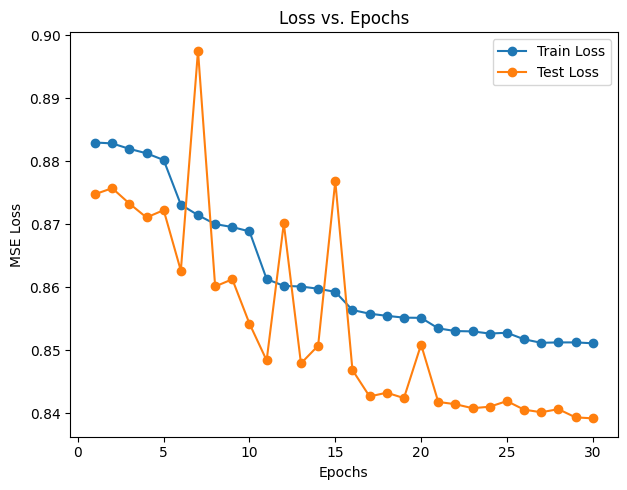

In [55]:

# Final Evaluation (Regression Error)

model.eval()
running_test_loss = 0.0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        running_test_loss += loss.item() * batch_X.size(0)

final_test_loss = running_test_loss / len(test_loader.dataset)
print("Final Test Loss:", final_test_loss)


# Visualization of Training and Test Loss

epochs = range(1, len(train_losses) +1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, marker='o', label='Train Loss')
plt.plot(epochs, test_losses, marker='o', label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [68]:
def recommend_top5(model, merged_df_encoded, user_val, candidate_features_cols):
    """
    Generate top 5 recommended stories for a given user based on predicted read percentage.

    Args:
        model: Trained PyTorch regression model.
        merged_df_encoded: Preprocessed DataFrame containing user interactions and story data.
        user_val: Specific user_id for whom recommendations will be generated.
        candidate_features_cols: List of feature columns used for prediction.

    Returns:
        DataFrame containing the top 5 recommended pratilipis for the user.
    """
    # Filter user-specific candidate stories
    candidate_df = merged_df_encoded[merged_df_encoded['user_id'] == user_val]

    # If no stories exist for the user, return an empty DataFrame
    if candidate_df.empty:
        print(f"No candidate pratilipis found for user {user_val}.")
        return candidate_df

    # Extract feature values for these candidates
    X_candidates = candidate_df[candidate_features_cols].values
    X_candidates_tensor = torch.tensor(X_candidates, dtype=torch.float32).to(device)

    # Predict engagement scores using the trained model
    model.eval()
    with torch.no_grad():
        preds = model(X_candidates_tensor).cpu().numpy().flatten()

    # Add predictions to candidate DataFrame
    candidate_df = candidate_df.copy()
    candidate_df['predicted_score'] = preds

    # Sort by predicted score in descending order
    candidate_df_sorted = candidate_df.sort_values(by='predicted_score', ascending=False)

    # Drop duplicate pratilipi_id to ensure unique recommendations
    candidate_df_sorted = candidate_df_sorted.drop_duplicates(subset=['pratilipi_id'])

    # Convert log-transformed scores back to original scale
    candidate_df_sorted['predicted_score'] = np.exp(candidate_df_sorted['predicted_score']) - 1

    # Get category names for each pratilipi_id
    category_columns = [col for col in merged_df_encoded.columns if col.startswith('category_name_')]
    category_mapping = merged_df_encoded.set_index('pratilipi_id')[category_columns].idxmax(axis=1).to_dict()
    candidate_df_sorted['category_name'] = candidate_df_sorted['pratilipi_id'].map(category_mapping).str.replace('category_name_', '')

    # Return top 5 recommendations
    return candidate_df_sorted.head(5)


# SELECT A SAMPLE USER & GET RECOMMENDATIONS

sample_user = 21  # Example user ID

# List of feature columns used for prediction
feature_cols = ['user_id', 'author_id', 'story_age_days', 
                'interaction_hour', 'interaction_day', 'interaction_month', 
                'interaction_weekday'] + [col for col in merged_df_encoded.columns if col.startswith('category_name_')]

# Generate recommendations
top5_recommendations = recommend_top5(model, merged_df_encoded, sample_user, feature_cols)

# Print the recommended pratilipis if available
if not top5_recommendations.empty:
    print("Top 5 unique recommendations for user ID 21:")
    print(top5_recommendations[['pratilipi_id', 'predicted_score', 'category_name']])


Top 5 unique recommendations for user ID 21:
         pratilipi_id  predicted_score category_name
185564         100259      1605.691284        social
2060743         82329      1598.160278        social
3041211         72463      1586.792480        social
3123340        134076      1524.476074        horror
405700         132667      1522.555542        horror


In [69]:
# First time user recommenatation by category

# Ensure column names are trimmed and lowercase for consistency
merged_df_encoded.columns = merged_df_encoded.columns.str.strip().str.lower()

# Get all available category columns in dataset
category_columns = [col for col in merged_df_encoded.columns if col.startswith("category_name_")]

def recommend_by_category(merged_df, category_list):
    """
    Recommend top 5 pratilipi IDs based on selected categories.

    Args:
        merged_df (DataFrame): The dataset containing pratilipi information.
        category_list (str or list): One or multiple categories (e.g., "social", ["romance", "novel"]).

    Returns:
        DataFrame: Top 5 pratilipi recommendations based on highest effective read words.
    """

    # Ensure category_list is a list (convert from string if needed)
    if isinstance(category_list, str):
        category_list = [category_list]

    # Convert input categories to lowercase and add prefix to match dataset columns
    category_list = [f"category_name_{cat.lower()}" for cat in category_list]

    # Check if requested categories exist in dataset
    valid_categories = [col for col in category_list if col in category_columns]

    if not valid_categories:
        print(f"No matching categories found in dataset for: {category_list}")
        print(f"Available categories: {[col.replace('category_name_', '') for col in category_columns]}")
        return None

    # Filter dataset to include only rows where at least one of the selected categories is 1
    category_filter = merged_df_encoded[valid_categories].sum(axis=1) > 0
    filtered_df = merged_df_encoded[category_filter]

    if filtered_df.empty:
        print(f"No pratilipis found for the selected categories: {category_list}")
        return None

    # Convert log-transformed effective read words back to actual word count
    filtered_df = filtered_df.copy()
    filtered_df["effective_read_words"] = filtered_df["effective_read_words"].apply(lambda x: round(np.expm1(x)))

    # Sort by highest effective read words and select top 5 unique pratilipi_ids
    top_pratilipis = (
        filtered_df.sort_values(by="effective_read_words", ascending=False)
        .drop_duplicates(subset="pratilipi_id")
        .head(5)
    )

    # Extract categories associated with each pratilipi_id
    top_pratilipis["categories"] = top_pratilipis.apply(
        lambda row: ", ".join([col.replace("category_name_", "") for col in category_columns if row[col] == 1]),
        axis=1
    )

    # Select only relevant columns
    final_result = top_pratilipis[["pratilipi_id", "categories"]]

    return final_result



# User selects one category
print("\n🔹 Recommendation for 'social':")
recommendations = recommend_by_category(merged_df_encoded, "social")
if recommendations is not None:
    display(recommendations)

# User selects multiple categories
print("\n🔹 Recommendation for 'romance':")
recommendations_1 = recommend_by_category(merged_df_encoded, ["romance"])
if recommendations_1 is not None:
    display(recommendations_1)



🔹 Recommendation for 'social':


,pratilipi_id,categories
3851401,719,social
3094213,385,social
2722432,688,social
3580723,1014,social
3303350,851,social



🔹 Recommendation for 'romance':


,pratilipi_id,categories
3901564,1125,romance
3580722,1014,romance
3158012,2360,romance
1173799,3696,romance
1231827,3593,romance


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression_accuracy(model, test_loader, device):
    """
    Evaluate the trained regression model using standard metrics: RMSE, MAE, and R² Score.

    Args:
        model: Trained PyTorch regression model.
        test_loader: DataLoader containing test data.
        device: 'cuda' if GPU is available, otherwise 'cpu'.
    
    Returns:
        Dictionary with RMSE, MAE, and R² Score.
    """
    
    # Set the model to evaluation mode (disables dropout, batch normalization updates)
    model.eval()
    
    # Lists to store actual values and model predictions
    actuals = []
    predictions = []
    
    # Disable gradient computation during evaluation (reduces memory usage and speeds up inference)
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            # Move test data to the specified device (GPU/CPU)
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)
            
            # Get model predictions
            outputs = model(batch_X).cpu().numpy().flatten()
            
            # Store actual and predicted values for evaluation
            actuals.extend(batch_y.cpu().numpy().flatten())
            predictions.extend(outputs)

    # Compute regression metrics
    mse = mean_squared_error(actuals, predictions) # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error (more interpretable than MSE)
    mae = mean_absolute_error(actuals, predictions) # Mean Absolute Error
    r2 = r2_score(actuals, predictions) # R² Score (how well the model explains variance in the data)

    print(f"🔹 RMSE: {rmse:.4f}")
    print(f"🔹 MAE: {mae:.4f}")
    print(f"🔹 R² Score: {r2:.4f}")

    return {"RMSE": rmse, "MAE": mae, "R2_Score": r2}


# Evaluation
evaluate_regression_accuracy(model, test_loader, device)


🔹 RMSE: 0.9161
🔹 MAE: 0.6104
🔹 R² Score: 0.0884


{'RMSE': 0.91606504, 'MAE': 0.6103892, 'R2_Score': 0.08838980543760289}